### #Assumption
#### Neighborhoods must be homogenous

In [33]:
import pandas as pd
import numpy as np

!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: C:\Users\ryanr\OneDrive\Documents\JN PLAYGROUND\Supervised Algorithms\multiclass.csv

  0%|          | 0.00/14.6k [00:00<?, ?B/s]
100%|##########| 14.6k/14.6k [00:00<?, ?B/s]


In [34]:
df= pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [35]:
df.shape

(440, 8)

<Axes: xlabel='class'>

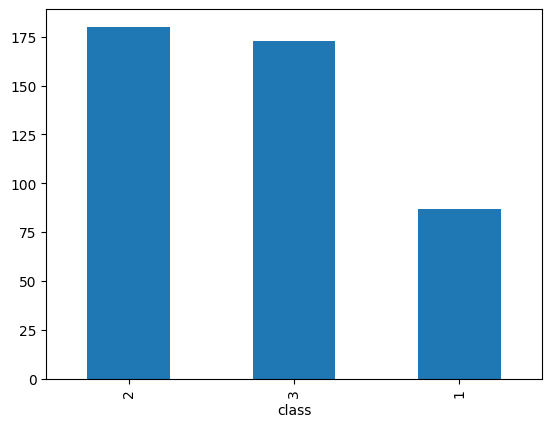

In [36]:
df['class'].value_counts().plot(kind='bar')

In [37]:
df.columns

Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'class'],
      dtype='object')

In [38]:
X = df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen']].copy()
y = df[['class']].copy()

### Converting Seven Features to Two Features
Using Principal Component Analysis

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
visualize = pca.fit_transform(X)
visualize.shape

(440, 2)

In [40]:
#After PCA, 86% of the variance is preserved
pca.explained_variance_ratio_.sum()

np.float64(0.8647858835001756)

In [41]:
visualize[:5]

array([[  650.02212362,  1585.51909033],
       [-4426.80497775,  4042.45150918],
       [-4841.99870521,  2578.76217634],
       [  990.3464383 , -6279.80599639],
       [10657.9987326 , -2159.72581509]])

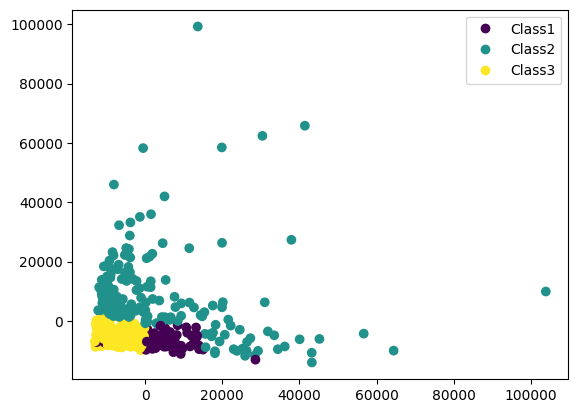

In [42]:
scatter = plt.scatter(visualize[:, 0], visualize[:,1], c = y.values[:, 0])
plt.legend(handles=scatter.legend_elements()[0], labels=['Class1', 'Class2', 'Class3'])

In [43]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(264, 7) (264, 1)
(88, 7) (88, 1)
(88, 7) (88, 1)


In [44]:
y_train.value_counts()

class
2        108
3        103
1         53
Name: count, dtype: int64

In [45]:
#Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

#Create an instance of SMOTE
smt = SMOTE()

#Resampling only on TRAIN data
X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()

class
1        108
2        108
3        108
Name: count, dtype: int64

In [46]:
y_sm.value_counts()

class
1        108
2        108
3        108
Name: count, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val = st.transform(X_val.values)
X_test = st.transform(X_test.values)

y_sm = y_sm.values[:, 0]
y_val = y_val.values[:, 0]
y_test =y_test.values[:, 0]



In [48]:
#First column
# df[:, 0]

In [49]:
# L2 NORM
def distance(a, b):
    return np.sum((a-b)**2)**0.5

In [50]:
def kNN(X, Y, xq, k=7):
    distances = []
    for i in range(len(X)):
        d = distance(xq, X[i])
        distances.append((d, Y[i]))

    distances.sort()
    top_k = distances[:k]
    top_k = np.array(top_k)
    #Last column
    labels = top_k[:, -1]

    uniq = pd.value_counts(labels).index[0]

    return uniq

In [51]:
X_val[22]

array([ 0.69337525,  1.17217096, -0.22070619, -0.5490058 ,  1.46824718,
       -0.4813866 , -0.04082056])

In [52]:
kNN(X_sm, y_sm, X_val[22], k=5)

C:\Users\ryanr\AppData\Local\Temp\ipykernel_26200\3579556779.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  uniq = pd.value_counts(labels).index[0]


np.float64(1.0)

In [53]:
y_val[22]

np.int64(1)

In [54]:
y_pred = []
for xq in X_val:
    p = kNN(X_sm,y_sm, xq, k=5)
    y_pred.append(p)

y_pred = np.array(y_pred)

C:\Users\ryanr\AppData\Local\Temp\ipykernel_26200\3579556779.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  uniq = pd.value_counts(labels).index[0]


In [55]:
y_pred[:10]

array([2., 3., 3., 1., 3., 3., 3., 2., 3., 1.])

In [56]:
y_val[:10]

array([2, 3, 3, 1, 3, 3, 3, 2, 3, 3])

In [57]:
100*(y_pred == y_val).mean()

np.float64(87.5)

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [59]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[18,  0,  0],
       [ 5, 27,  1],
       [ 5,  0, 32]])

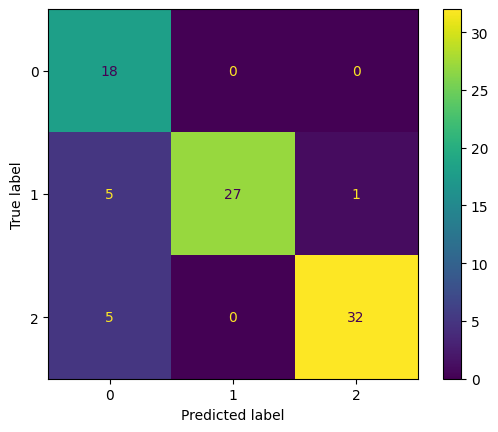

In [60]:
ConfusionMatrixDisplay(cm).plot()

### We are predicting many zeroes!
Hence, we need to find various values of k!


## With sklearn!

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_sm, y_sm)  #No working happens here

KNeighborsClassifier()

In [63]:
model.predict(X_val)

array([2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 3, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 3, 1, 1, 3, 1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 3, 1, 1, 2, 2, 3,
       3, 2, 2, 1, 2, 3, 1, 2, 3, 1, 3, 2, 1, 2, 2, 1, 1, 3, 2, 3, 3, 3,
       1, 3, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2])

In [64]:
model.score(X_val, y_val)

0.875

In [66]:
Acc = []

#Calculating error for K values between 1 & 50
# Note: 51 is not included 

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val, y_val))

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',)